# Numerical projects and Exercises

In [2]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt

1.1 **Distributions as histograms** The goal is to reproduce Figure 1.1.

(a) Sample 𝑁 = 10,000 random numbers uniformly on [0, 1].
This can be done using the command numpy.random in Python.

In [3]:
random_numbers = np.random.rand(10000)

(b) Plotting the PDF: Divide the interval [0,1] into 𝑚 bins $𝐵_1, . . . , 𝐵_{50}$ of equal length $1/50$. Plot the histogram of the values for 50 bins where the value at each bin $𝑗$ is $ \frac{\# \{i \leq N : X_i \in B_j\}}{N}$.
The command hist in matplotlib.pyplot is useful here. The option density gives the PDF.

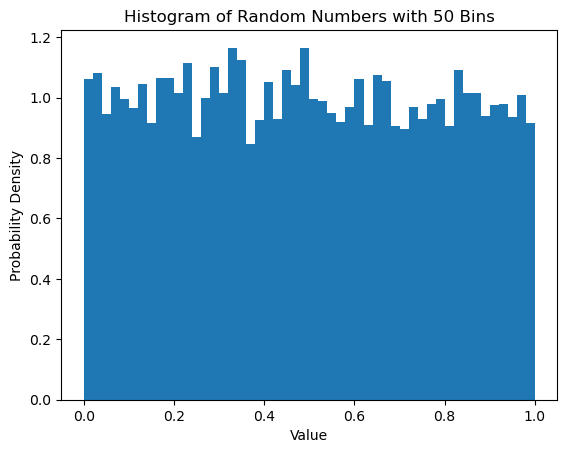

In [4]:
# Define the number of bins
m = 50

# Define the bin edges
bin_edges = np.linspace(0, 1, m+1)

# Plot the histogram
plt.hist(random_numbers, bins=bin_edges, density=True)
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Histogram of Random Numbers with 50 Bins')
plt.show()

(c) Plotting the CDF: Plot the cumulative histogram of the values for 50 bins where the value at each bin 𝑗 is $ \frac{\# \{i \leq N : X_i \leq j/50\}}{N}$. The option cumulative does the trick here.

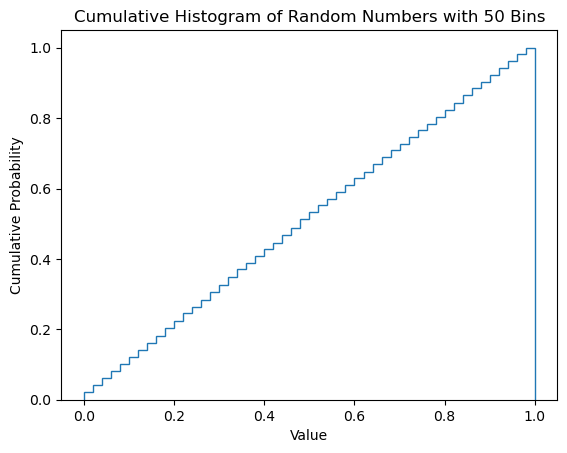

In [5]:
plt.hist(random_numbers, bins=bin_edges, density=True, cumulative=True, histtype='step')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Histogram of Random Numbers with 50 Bins')
plt.show()

(d) Re-do items (b) and (c) for the square of each number. This would approximate the PDF of $𝑋^2$ where 𝑋 is uniformly distributed on [0,1].

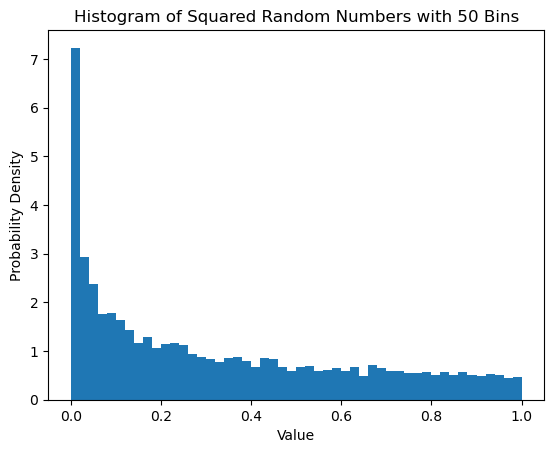

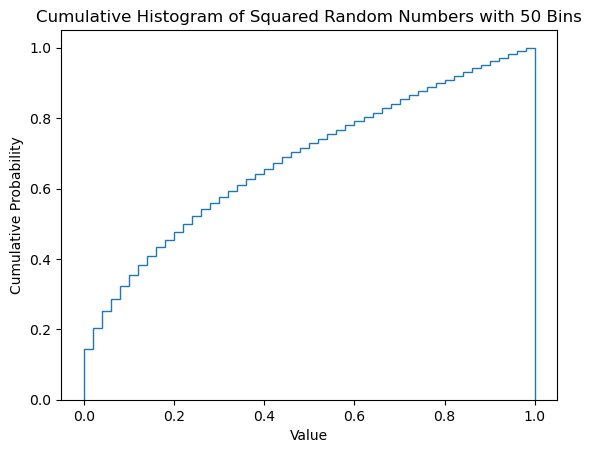

In [6]:
squared_random_numbers = random_numbers ** 2

plt.hist(squared_random_numbers, bins=bin_edges, density=True)
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Histogram of Squared Random Numbers with 50 Bins')
plt.show()

plt.hist(squared_random_numbers, bins=bin_edges, density=True, cumulative=True, histtype='step')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Histogram of Squared Random Numbers with 50 Bins')
plt.show()

1.2 **The law of large numbers** This project is about getting acquainted with the law of large numbers seen in equation (1.5). We experiment with exponential random variables, but any distributions would do as long as the expectation is defined.

(a) **The strong law** Sample $𝑁 = 10,000$ random numbers $𝑋_1, ..., 𝑋_𝑁$ exponentially distributed with parameter 1. Use the command numpy.cumsum to get the empirical mean $ \frac{𝑆_𝑁}{𝑁} = \frac{1}{𝑁} (𝑋_1 + ⋯ + 𝑋_𝑁 )$. Plot the values for $𝑁 =
1, . . . , 10,000$. What do you notice?

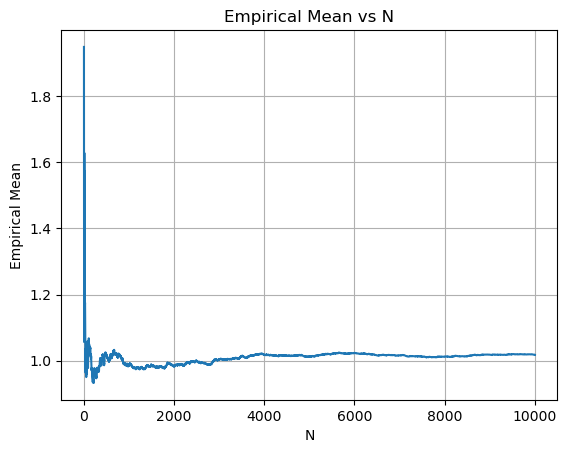

In [7]:
random_numbers = np.random.exponential(scale=1, size=10000)

empirical_mean = np.zeros(10000)
N = np.arange(1, 10001)

for i in N:
    cumulative_sum = np.cumsum(random_numbers[:i])
    empirical_mean[i-1] = cumulative_sum[-1] / i
    
plt.plot(N, empirical_mean)
plt.xlabel('N')
plt.ylabel('Empirical Mean')
plt.title('Empirical Mean vs N')
plt.grid(True)
plt.show()

(b) **The weak law** Define a function in Python using the command def that returns the empirical mean of a sample of size 𝑁 as above. This will allow you to sample the empirical mean $𝑆𝑁/𝑁$ as many times as needed for a given 𝑁. Plot the histograms (PDF and CDF) of a sample of size 10,000 of the empirical mean for 𝑁 = 100 and 𝑁 = 10,000. What do you notice?

In [8]:
def empirical_mean_sample(N):
    random_numbers = np.random.exponential(scale=1, size=N)
    sum = np.sum(random_numbers)
    return sum / N

empirical_mean_N_100 = []
empirical_mean_N_10000 = []

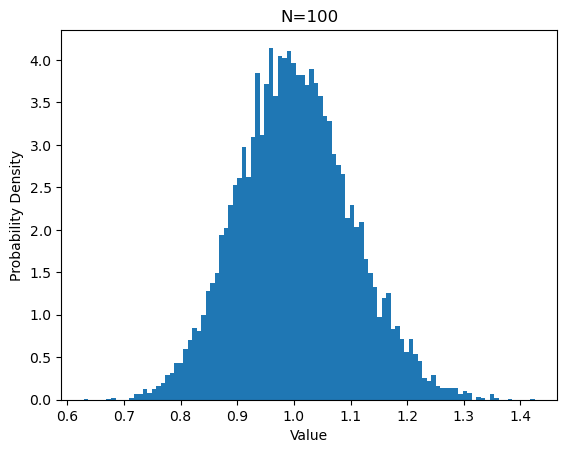

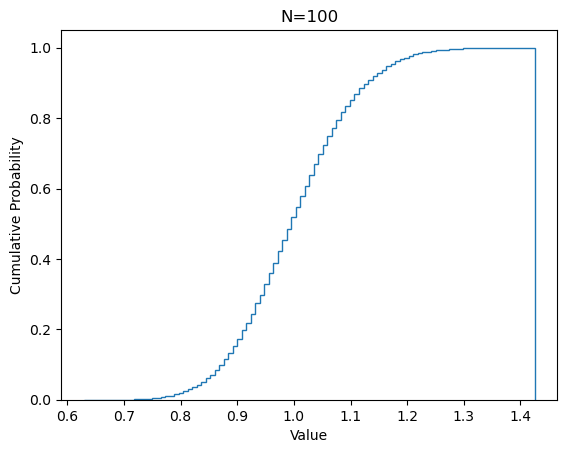

In [9]:
for i in range(10000):
    empirical_mean_N_100.append(empirical_mean_sample(100))
    

plt.hist(empirical_mean_N_100, bins=100, density=True)
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('N=100')
plt.show()

plt.hist(empirical_mean_N_100, bins=100, density=True, cumulative=True, histtype='step')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('N=100')
plt.show()

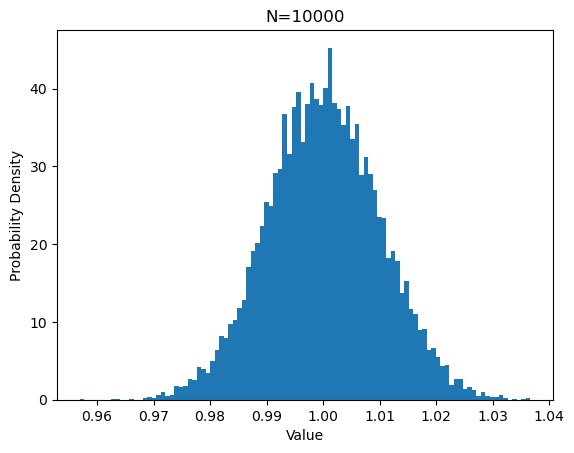

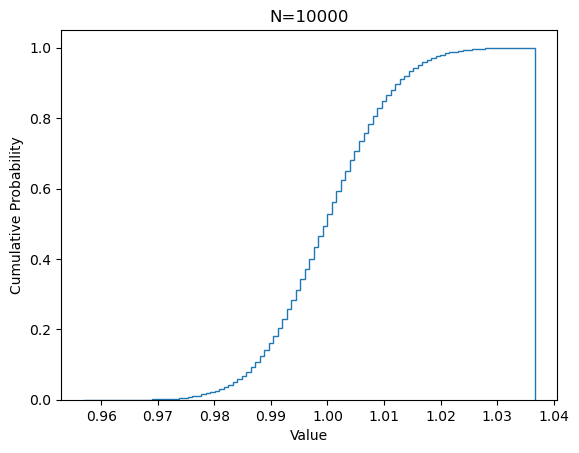

In [10]:
for i in range(10000):
    empirical_mean_N_10000.append(empirical_mean_sample(10000))


plt.hist(empirical_mean_N_10000, bins=100, density=True)
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('N=10000')
plt.show()

plt.hist(empirical_mean_N_10000, bins=100, density=True, cumulative=True, histtype='step')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('N=10000')
plt.show()

1.3 **The central limit theorem** The approximation (1.5) of the expectation in terms of the empirical mean is not exact for finite 𝑁. The error is controlled by the central limit theorem. For a sample $𝑋_1, . . . , 𝑋_𝑁$ of the random variable 𝑋 of mean $E[𝑋]$ and variance $𝜎^2$, this theorem says that the sum $𝑆_𝑁 = 𝑋_1 + ⋯ + 𝑋_𝑁$ behaves like $S_N \approx N E[X] + \sqrt{N} \sigma Z$, where 𝑍 is a standard Gaussian random variable. More precisely, this means that $lim_{N \to \infty} \frac{S_N - N E[X]}{\sigma \sqrt{N}} = Z$.

The limit should be understood here as the convergence in distribution. Practically speaking, this means that the histogram of the random variable $\frac{S_N - N E[X]}{\sigma \sqrt{N}}$ should resemble the one of a standard Gaussian variable when 𝑁 is large. We check this numerically.

(a) Let $𝑆_𝑁 = 𝑋_1 + ⋯ + 𝑋_𝑁$ where the 𝑋𝑖 are exponentially distributed random variables of parameter 1. Define a function in Python using the command def that returns for a given 𝑁 the value $Y_N = \frac{S_N - N E[X]}{\sigma \sqrt{N}}$.

In [11]:
def calculate_Y_N(N):
    
    # Generate N exponentially distributed random variables
    X = np.random.exponential(scale=1, size=N)
    
    # Calculate the sum of X
    S_N = np.sum(X)
    
    # Calculate E[X] and sigma
    E_X = 1    # E[X] of expoential distribution is 1/scale
    sigma = 1  # Var(X) of exponential distribution is 1/scale^2
    
    # Calculate Y_N
    Y_N = (S_N - N * E_X) / (sigma * np.sqrt(N))
    
    return Y_N

(b) Plot the histograms (PDF) of a sample of size 10,000 of $𝑌_𝑁$ for 𝑁 = 100. What do you notice?

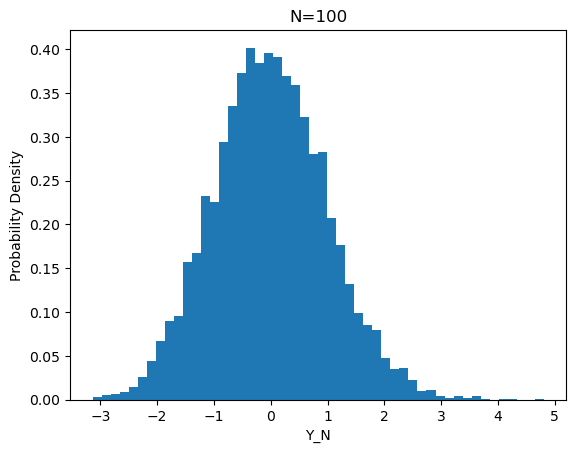

In [12]:
Y_N_100 = []

for i in range(10000):
    Y_N_100.append(calculate_Y_N(100))
    
plt.hist(Y_N_100, bins=50, density=True)
plt.xlabel('Y_N')
plt.ylabel('Probability Density')
plt.title('N=100')
plt.show()

(c) Compare the above to the histogram of a sample of size 10,000 of points generated
using the standard Gaussian distribution.

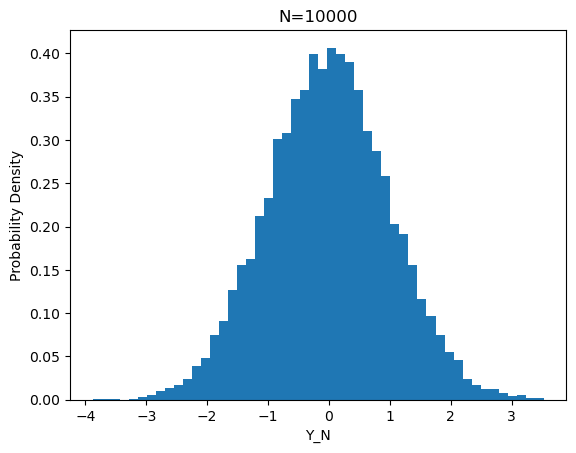

In [13]:
Y_N_10000 = []

for i in range(10000):
    Y_N_10000.append(calculate_Y_N(10000))
    
plt.hist(Y_N_10000, bins=50, density=True)
plt.xlabel('Y_N')
plt.ylabel('Probability Density')
plt.title('N=10000')
plt.show()

1.4 **Sampling Cauchy random variables.** Here, we reproduce Figure 1.2. In particular, it shows that there is no law of large numbers (weak or strong) for Cauchy random variables.

(a) Let $F^{-1}_X$ be the inverse of the CDF of the Cauchy distribution in Example 1.26. Plot the histogram of $F^{-1}_X(U)$ where 𝑈 is a uniform random variable for sample of 10,000 points. Use 100 bins in the interval [-10,10]. The command random in numpy also has a Cauchy option, if you want to skip this step.

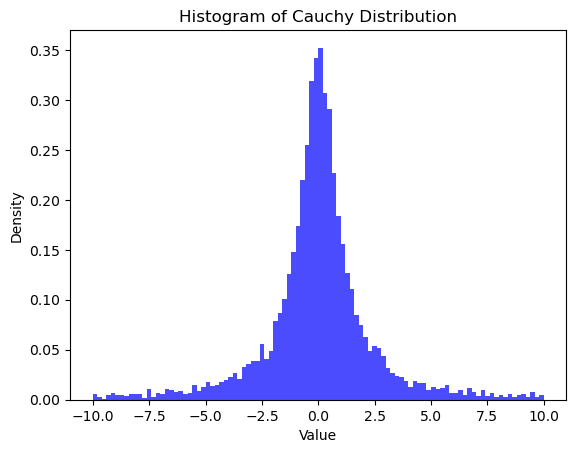

In [19]:
cauchy_data = np.random.standard_cauchy(size=10000)

# Plot histogram with 100 bins between [-10, 10]
plt.hist(cauchy_data, bins=100, range=(-10, 10), density=True, color='blue', alpha=0.7)
plt.title('Histogram of Cauchy Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

(b) Compare the above to the histogram of a sample of size 10,000 of points generated using the standard Gaussian distribution.

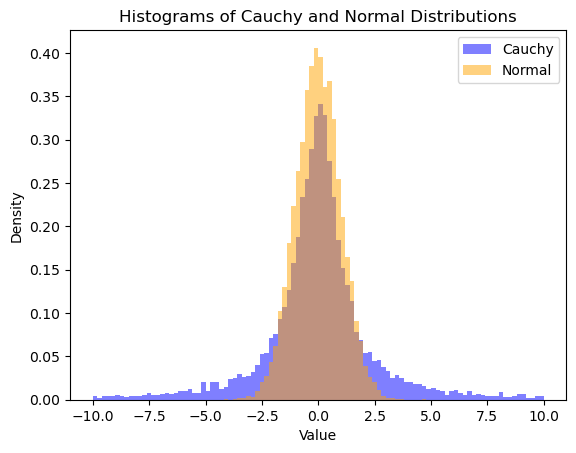

In [16]:
# Sample 10,000 points from a standard normal distribution
data_normal = np.random.standard_normal(size=10000)

# Plot histograms with different colors
plt.hist(cauchy_data, bins=100, range=(-10, 10), density=True, color='blue', alpha=0.5, label='Cauchy')
plt.hist(data_normal, bins=100, range=(-10, 10), density=True, color='orange', alpha=0.5, label='Normal')

plt.title('Histograms of Cauchy and Normal Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.show()

(c) Let $(𝐶_𝑛, 𝑛 \leq 10,000)$ be the values obtained in (a). Plot the empirical mean $𝑆_𝑁/𝑁 = \frac{1}{𝑁} \sum_{n \leq N} 𝐶_𝑛$ for 𝑁 = 1, . . . , 10,000. What do you notice?

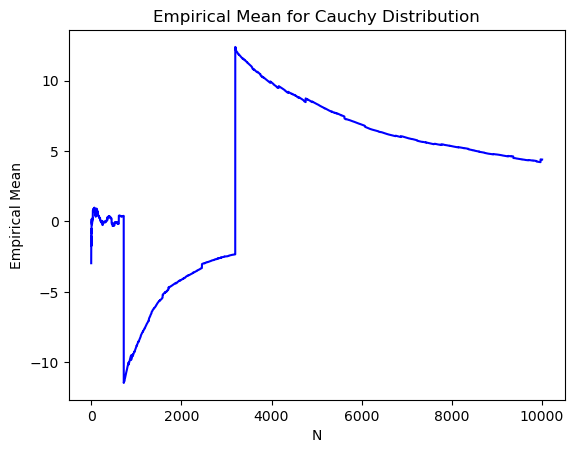

In [22]:
# Sample 10,000 points from a Cauchy distribution
cauchy_data = np.random.standard_cauchy(size=10000)

# Calculate the empirical mean for each N
empirical_means = np.cumsum(cauchy_data) / np.arange(1, 10001)

# Plot the empirical mean
plt.plot(np.arange(1, 10001), empirical_means, color='blue')
plt.title('Empirical Mean for Cauchy Distribution')
plt.xlabel('N')
plt.ylabel('Empirical Mean')
plt.show()

(d) Define a function in Python using the command def that returns the empirical mean $𝑆_𝑁/𝑁$ of a sample of size 𝑁 as above. Plot the histograms (PDF) of a sample of size 10,000 of the empirical mean for 𝑁 = 10 and 𝑁 = 100. What do you notice compared to the histograms in Project 1.2?

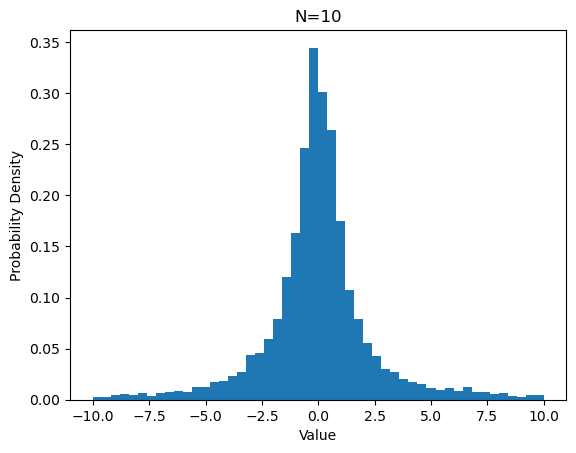

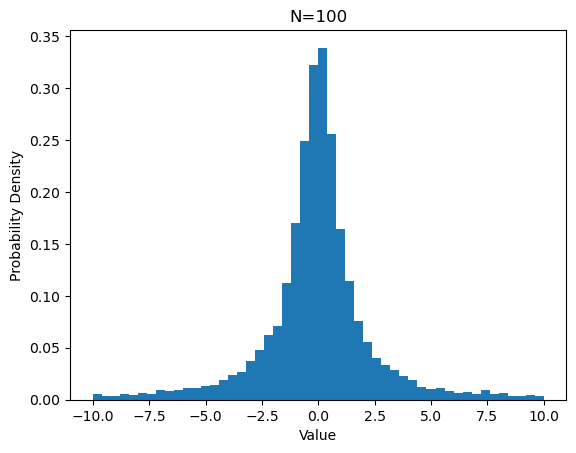

In [33]:

def empirical_mean(N):
    cauchy_data = np.random.standard_cauchy(size=N)
    # Calculate the empirical mean for sample of size N
    return np.sum(cauchy_data) / N

empirical_mean_N_10 = []
empirical_mean_N_100 = []

for i in range(10000):
    empirical_mean_N_10.append(empirical_mean(10))
    
for i in range(10000):
    empirical_mean_N_100.append(empirical_mean(100))
    
plt.hist(empirical_mean_N_10, bins=50, range=(-10,10), density=True)
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('N=10')
plt.show()

plt.hist(empirical_mean_N_100, bins=50, range=(-10,10), density=True)
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('N=100')
plt.show()